<a href="https://colab.research.google.com/github/pompymandislian/Deep-Learning-Fundamentals/blob/main/(Part_1)_Fundamental_Math_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import display
from numpy import ndarray
import numpy as np
import matplotlib.pyplot as plt

*Source Book : Seth Wiedman - Deep Learning From Scratch*

# Derivative One Input
---


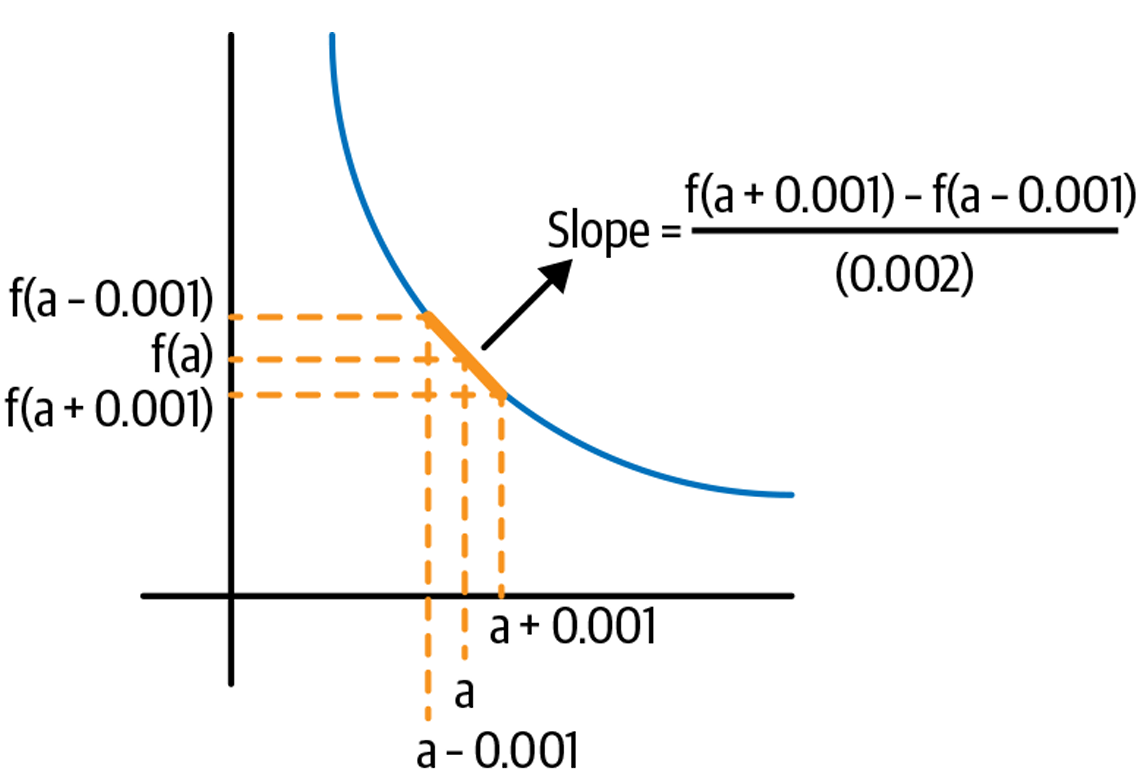

In [ ]:
display.Image("/content/drive/MyDrive/youtube/Deep Learning/Math Deep Learning/deriv.png")

Obtain slope for derivative

In [ ]:
from typing import Callable

def deriv(func: Callable[[np.ndarray], np.ndarray],
          input_: np.ndarray,
          delta: float = 0.001) -> np.ndarray:
    '''
    Evaluates the derivative of a function "func" at every element in the
    "input_" array.
    '''
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)

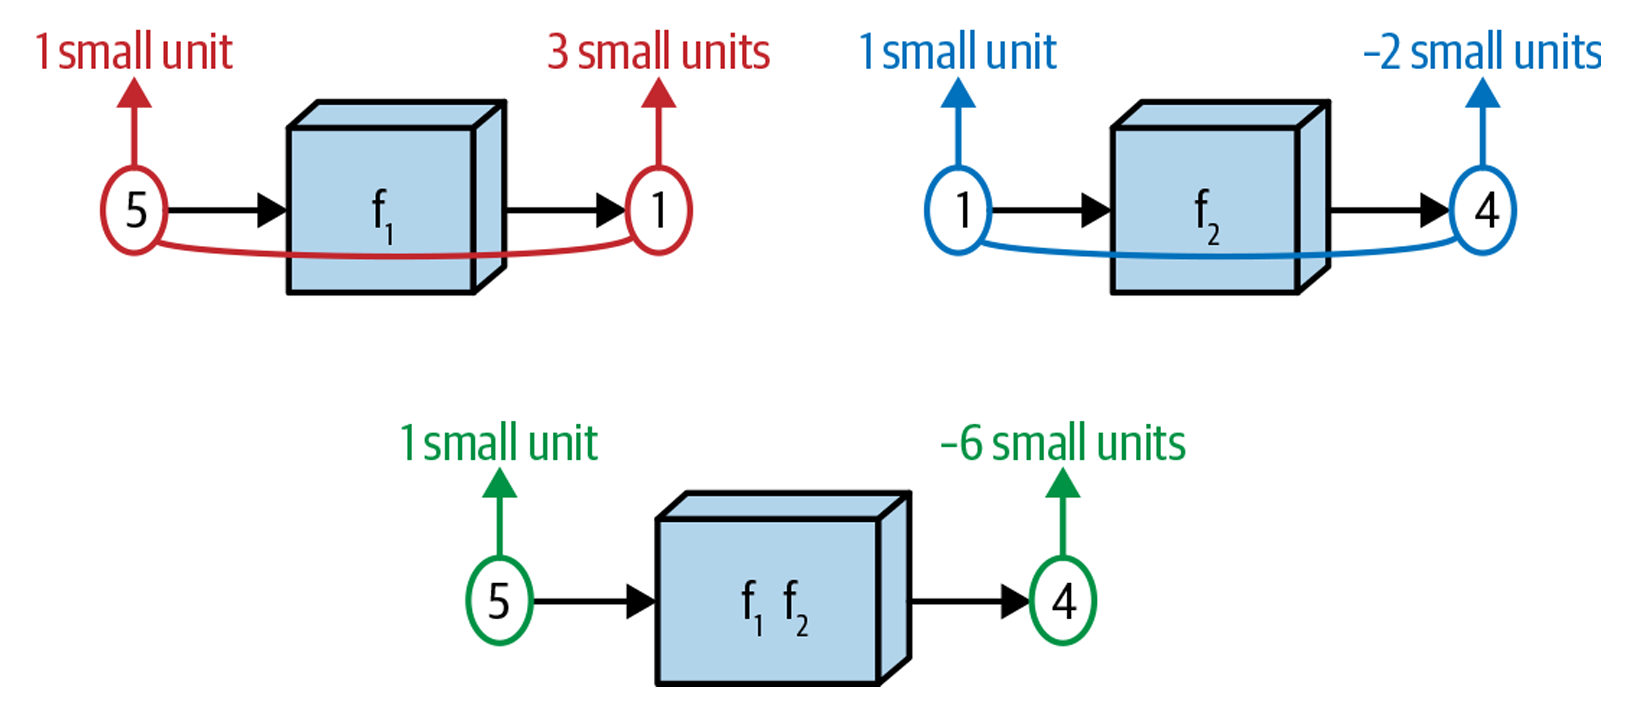

In [ ]:
display.Image("/content/drive/MyDrive/youtube/Deep Learning/Math Deep Learning/chain rule.png")

Chain Rule for obtain derivative values, with f1 and f2

In [ ]:
from typing import List

# A Function takes in an ndarray as an argument and produces an ndarray
Array_Function = Callable[[ndarray], ndarray]

# A Chain is a list of functions
Chain = List[Array_Function]

In [ ]:
def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray.1
    '''
    return np.maximum(0.2 * x, x)

def square(x: ndarray):
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)

def sigmoid(x: ndarray):
    """Apply sigmoid"""
    return 1 / (1 + np.exp(-x))

In [ ]:
def chain_rule(chain: Chain,
               input_range: ndarray):
    """
    Compare sigmoid with chain rule
    """
    # Compare f1 and f2
    assert len(chain) == 2

    # Make sure 1 dimension
    assert input_range.ndim == 1

    # Define f1 and f2
    f1 = chain[0]
    f2 = chain[1]

    # df1/dx
    f1_of_x = f1(input_range)

    # df1/du
    df1dx = deriv(f1, input_range)

    # df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))

    return df1dx * df2du

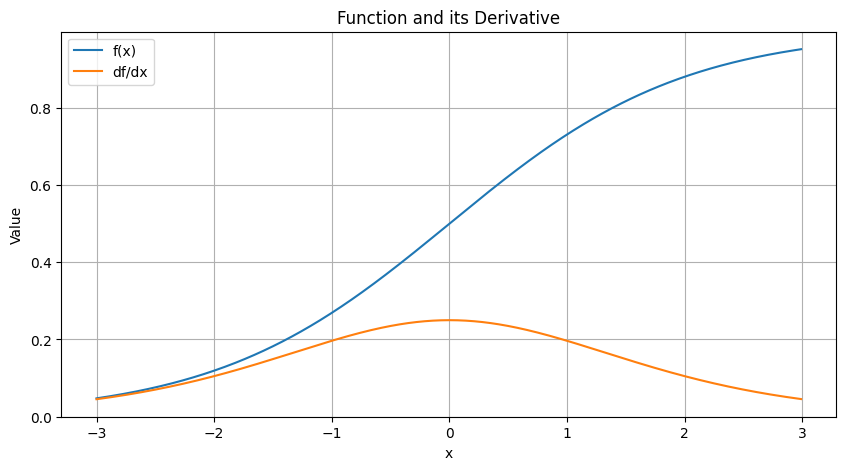

In [ ]:
# Define data
PLOT_RANGE = np.arange(-3, 3, 0.01)

# Define chain
chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

# Plot chain
plt.figure(figsize=(10, 5))
plt.plot(PLOT_RANGE, chain_2[0](PLOT_RANGE), label='f(x)')
plt.plot(PLOT_RANGE, deriv(chain_2[0], PLOT_RANGE), label='df/dx')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Function and its Derivative')
plt.legend()
plt.grid(True)
plt.show()

Perfect intuition, if up then is positive, if down then to zero or negative. Deep learning is basically a long chain of these functions whose derivatives can mostly be calculated.

What if we using f1,f2,f3?

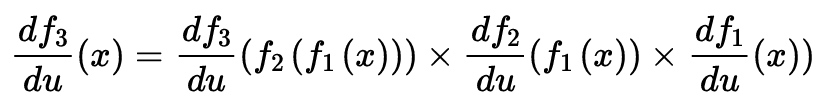

In [ ]:
display.Image("/content/drive/MyDrive/youtube/Deep Learning/Math Deep Learning/deriv3.png")

Derivatif slowly with step by step, how to this concept?

- Forward pass then backward pass

In [ ]:
def chain_deriv_3(chain: Chain,
                  input_range: ndarray):
    '''
    Uses the chain rule to compute the derivative of three nested functions:
    (f3(f2(f1)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)
    '''
    assert len(chain) == 3, \
    "This function requires 'Chain' objects to have length 3"
    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    # forward pass

    # f1(x)
    f1_of_x = f1(input_range)

    # f2(f1(x))
    f2_of_x = f2(f1_of_x)

    # backward pass

    # df3du
    df3du = deriv(f3, f2_of_x)

    # df2du
    df2du = deriv(f2, f1_of_x)

    # df1dx
    df1dx = deriv(f1, input_range)

    # Multiplying these quantities together at each point
    return df1dx * df2du * df3du

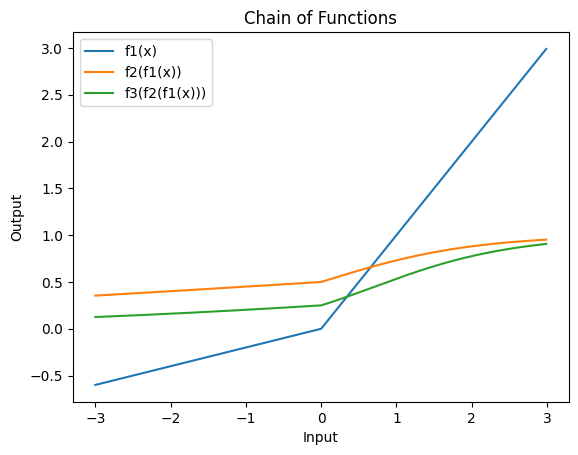

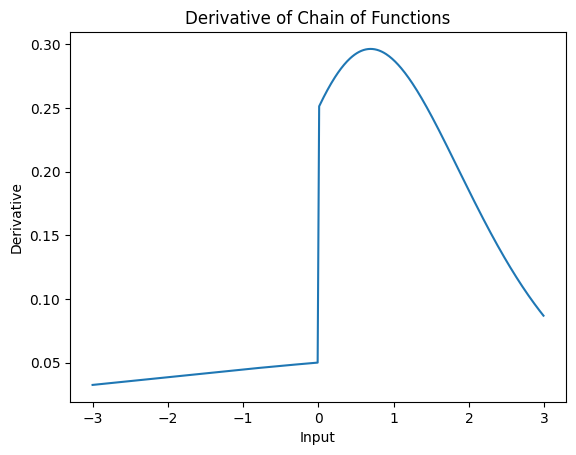

In [ ]:
def plot_chain(chain, input_range):
    """Obtain 3 function"""
    plt.plot(input_range, chain[0](input_range), label='f1(x)')
    plt.plot(input_range, chain[1](chain[0](input_range)), label='f2(f1(x))')
    plt.plot(input_range, chain[2](chain[1](chain[0](input_range))), label='f3(f2(f1(x)))')
    plt.legend()
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Chain of Functions')
    plt.show()

def plot_chain_deriv(chain, input_range):
    """Combaine 3 function"""
    deriv_result = chain_deriv_3(chain, input_range)
    plt.plot(input_range, deriv_result)
    plt.xlabel('Input')
    plt.ylabel('Derivative')
    plt.title('Derivative of Chain of Functions')
    plt.show()

# Define PLOT_RANGE
PLOT_RANGE = np.arange(-3, 3, 0.01)

# Plot the chain of functions
plot_chain([leaky_relu, sigmoid, square], PLOT_RANGE)

# Plot the derivative of the chain of functions
plot_chain_deriv([leaky_relu, sigmoid, square], PLOT_RANGE)


# Derivative multiple Input
---


Forward with multiple input

 $$f(x,y)=σ(x+y)$$

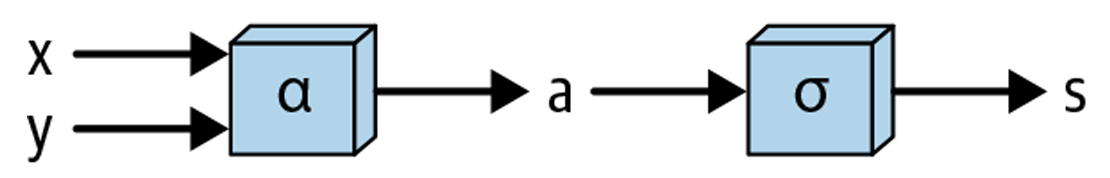

In [ ]:
display.Image("/content/drive/MyDrive/youtube/Deep Learning/Math Deep Learning/forward.png")

In [ ]:
def multiple_inputs_add(x: ndarray,
                        y: ndarray,
                       sigma: Array_Function):
    '''
    Function with multiple inputs and addition, forward pass.
    '''
    assert x.shape == y.shape
    a = x + y

    return sigma(a)

In [ ]:
# Let's Try
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

# Using sigmoid
result_sigmoid = multiple_inputs_add(x, y, sigmoid)
print("Result with sigmoid:", result_sigmoid)

Result with sigmoid: [0.99330715 0.99908895 0.99987661]


Backward with multiple input

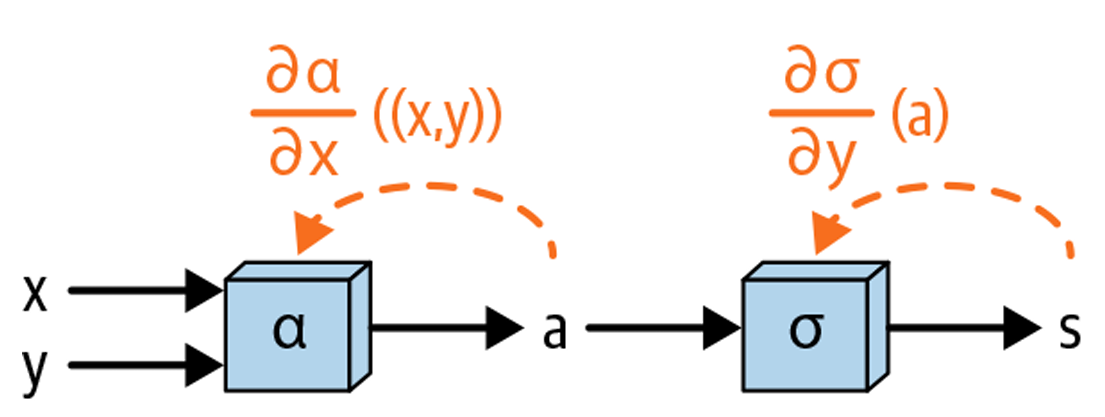

In [ ]:
display.Image("/content/drive/MyDrive/youtube/Deep Learning/Math Deep Learning/multiple.png")

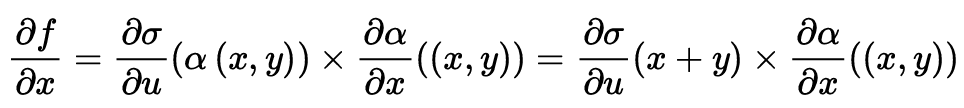

In [ ]:
display.Image("/content/drive/MyDrive/youtube/Deep Learning/Math Deep Learning/multipleinput.png")

In [ ]:
def multiple_inputs_add_backward(x: ndarray,
                                y: ndarray,
                                sigma: Array_Function):
  '''
  Computes the derivative of this simple function with respect to
  both inputs.
  '''
  # Compute "forward pass"
  a = x + y
  # Compute derivatives
  dsda = deriv(sigma, a)
  dadx, dady = 1, 1
  return dsda * dadx, dsda * dady

In [ ]:
# Let's try
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

# using sigmoid
dx_sigmoid, dy_sigmoid = multiple_inputs_add_backward(x, y, sigmoid)
print("Derivatives with sigmoid:", dx_sigmoid, dy_sigmoid)

Derivatives with sigmoid: [0.00664806 0.00091022 0.00012338] [0.00664806 0.00091022 0.00012338]


# Matrix Multiplication
---

Forward Pass

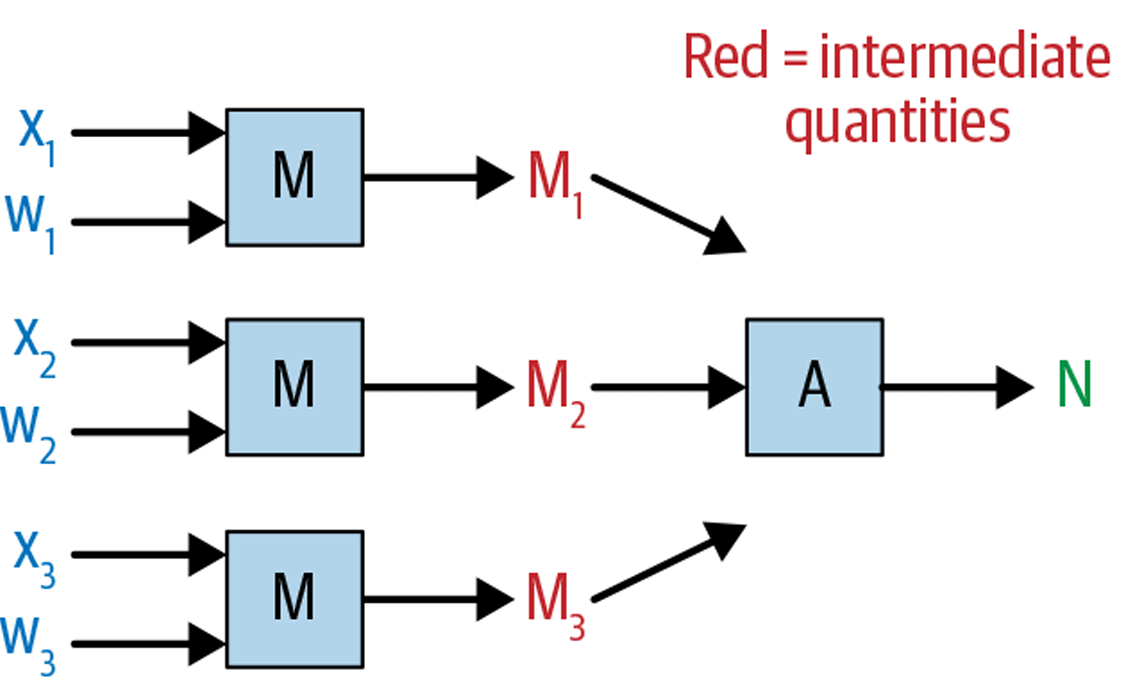

In [ ]:
display.Image("/content/drive/MyDrive/youtube/Deep Learning/Math Deep Learning/matmulforward.png")

In [ ]:
def matmul_forward(X: ndarray,
                   W: ndarray):
  '''
  Computes the forward pass of a matrix multiplication.
  '''
  assert X.shape[1] == W.shape[0], \
  '''
  For matrix multiplication, the number of columns in the first array should
  match the number of rows in the second; instead the number of columns in the
  first array is {0} and the number of rows in the second array is {1}.
  '''.format(X.shape[1], W.shape[0])

  # matrix multiplication
  N = np.dot(X, W)
  return N

In [ ]:
# Testing data
X = np.array([[1, 2, 3],
              [4, 5, 6]])

W = np.array([[7, 8],
              [9, 10],
              [11, 12]])

# Forward pass
result = matmul_forward(X, W)
print("Result of matmul_forward:\n", result)

Result of matmul_forward:
 [[ 58  64]
 [139 154]]


Backward Pass

```∂ν/∂X =[∂ν/∂X1, ∂ν/∂X2, ∂ν/∂X3]```

Diverent:
```
- ∂ν/∂X1 = w1
- ∂ν/∂X2 = w2
- ∂ν/∂X3 = w3
```
Result - X:

```∂ν/∂X = [w1, w2, w3] = W.T```

Result - W:
```
∂ν/∂W = x1
        x2 = X.T
        x3
```

Intuition:

```python
W = [[7, 8],
     [9, 10],
     [11, 12]]

np.transpose(W, (1, 0)) = [[ 7,  9, 11],
                           [ 8, 10, 12]]
```

In [ ]:
def matmul_backward_first(X: ndarray,
                          W: ndarray):
    '''
    Computes the backward pass of a matrix multiplication with respect to the
    first argument.
    '''
    # backward pass
    dNdX = np.transpose(W, (1, 0))
    return dNdX

In [ ]:
# let's try
X = np.array([[1, 2, 3],
              [4, 5, 6]])

W = np.array([[7, 8],
              [9, 10],
              [11, 12]])

# backward pass
dNdX = matmul_backward_first(X, W)
print("Result of matmul_backward_first:\n", dNdX)

Result of matmul_backward_first:
 [[ 7  9 11]
 [ 8 10 12]]


Back to derivative previous

What if we obtain multiple matrix in Forward pass?

Using this formula:

$s=f(X,W)=σ(ν(X,W))=σ(x1×w1+x2×w2+x3×w3)$

In [ ]:
def matrix_forward_extra(X: ndarray,
                         W: ndarray,
                         sigma: Array_Function):
  '''
  Computes the forward pass of a function involving matrix multiplication,
  one extra function.
  '''
  assert X.shape[1] == W.shape[0]
  # matrix multiplication
  N = np.dot(X, W)

  # feeding the output of the matrix multiplication through sigma
  S = sigma(N)

  return S

In [ ]:
# let's try
X = np.array([
    [0.5, 1.0, -1.5],
    [2.0, -1.0, 0.5]
])

W = np.array([
    [0.2, -0.5],
    [0.3, 0.8],
    [-0.4, 0.6]
])

S = matrix_forward_extra(X, W, sigmoid)
print(S)

[[0.73105858 0.41338242]
 [0.47502081 0.18242552]]


What if backward pass?

$∂f/∂X= ∂σ/∂u(ν(X,W))× ∂ν/∂X(X,W)= ∂σ/∂u(x1×w1+x2×w2+x3×w3)×WT$

In [ ]:
def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function):
  '''
  Computes the derivative of our matrix function with respect to
  the first element.
  '''
  assert X.shape[1] == W.shape[0]

  # matrix multiplication
  N = np.dot(X, W)

  # feeding the output of the matrix multiplication through sigma
  S = sigma(N)

  # backward calculation
  dSdN = deriv(sigma, N)

  # dNdX
  dNdX = np.transpose(W, (1, 0))

  # multiply them together; since dNdX is 1x1 here, order doesn't matter
  return np.dot(dSdN, dNdX)

In [ ]:
# let's try
S = matrix_function_backward_1(X, W, sigmoid)
print(S)

[[-0.0819263   0.25298148  0.06685366]
 [-0.02469802  0.19412997 -0.01026254]]
